$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/mor.groer/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-5-20 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)



requirements: /home/mor.groer/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


image 1/1: 183x275 2 persons, 1 surfboard
Speed: 126.6ms pre-process, 165.2ms inference, 111.0ms NMS per image at shape (1, 3, 448, 640)
image 1/1: 750x750 2 cats, 1 dog
Speed: 62.7ms pre-process, 29.0ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)


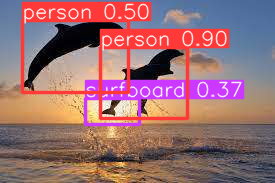

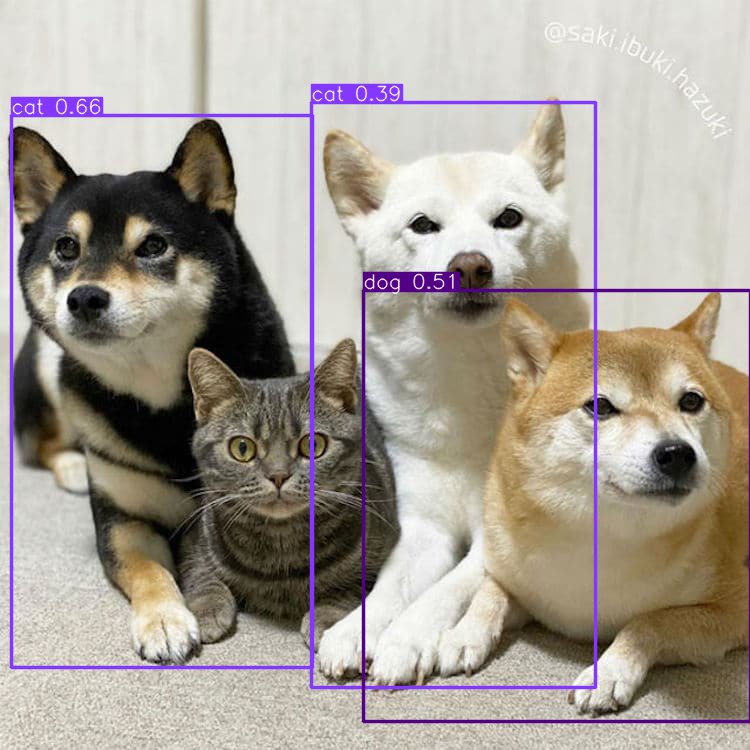

[         xmin       ymin        xmax        ymax  confidence  class       name
0  100.280930  47.355133  187.939117  118.408569    0.904160      0     person
1   22.574242  20.817221  128.945908   92.185432    0.544189      0     person
2   85.733398  98.164474  139.007065  124.544594    0.371106     37  surfboard,          xmin        ymin        xmax        ymax  confidence  class name
0   11.568510  115.775032  312.757050  667.323669    0.655977     15  cat
1  363.715546  290.178589  750.000000  721.983704    0.509417     16  dog
2  311.190704  102.437500  595.031738  687.870667    0.391701     15  cat]
tensor([[100.28093,  47.35513, 187.93912, 118.40857,   0.90416,   0.00000],
        [ 22.57424,  20.81722, 128.94591,  92.18543,   0.54419,   0.00000],
        [ 85.73340,  98.16447, 139.00706, 124.54459,   0.37111,  37.00000]], device='cuda:0')
1=275 , 2=183
b=44096.5859375
b=30276.615234375
b=15051.279296875
1=750 , 2=750
562500
a=166120.125
c=396379.875
a=332919.75
c=63460.125
a=

In [2]:
#Insert the inference code here.
from PIL import Image

with torch.no_grad():
    results1 = model(img1)
    results2 = model(img2)
    results1.print()
    results2.print()
    results1.show()
    results2.show()
    results = model([img1, img2])
    print(results.pandas().xyxy)
    img_1 = Image.open(img1)
    img_2 = Image.open(img2)
    print(results.xyxy[0])
    box_pixels1 = 0
    background_pixels1 = img_1.size[0] * img_1.size[1]
    print(f'1={img_1.size[0]} , 2={img_1.size[1]}')
    for image_result in results.xyxy[0]:
        x1, y1, x2, y2 = image_result[:4]
        box_pixels1 += (x2 - x1) * (y2 - y1)
        background_pixels1 -= box_pixels1
        print(f'b={background_pixels1}')
    
    box_pixels2 = 0
    background_pixels2 = img_2.size[0] * img_2.size[1]
    print(f'1={img_2.size[0]} , 2={img_2.size[1]}')
    print(background_pixels2)
    for image_result in results.xyxy[1]:
        x1, y1, x2, y2 = image_result[:4]
        box_pixels2 += (x2 - x1) * (y2 - y1)
        print(f'a={box_pixels2}')
        background_pixels2 -= box_pixels2
        print(f'c={background_pixels2}')
    
    print(box_pixels1)
    print(background_pixels1)
    print(box_pixels2)
    print(background_pixels2)

    


### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [10]:
from cs236781.answers import display_answer
import hw2.answers
display_answer(hw2.answers.part6_q1)



**Your answer:**
1.
The model detect not very well, we can see in the first picture that altough the model idetefiy the objects, when one object overlap aonther one, the model little mistake in the bounding box size.
Morover, in the second picture, we can see that again when one object overlap another one, not only the bounding box size is not very well, the model miss one of the object (the cat) in that picture.
Also the model fail in classifier most of the objects in both pictures.

2.
The reason that can possible be of the model's failures in the calssifier of the objects, is that myabe the model didnt train on a huge dataset of dolphins and most of the examples were of person, and that can lead him to make a incorrent classify.
Another reason is that the first picture is very rare because there are dolphins in the air while probably in most of the pictures they appear in the sea, and that can casue to confusing of the model.
Morover, another reason is that we use the model yolov5s, which has less parameters, therfore it is less accorate, when we try to use a diffrent model like yolov5m, it has a better results in the second picture.


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

image 1/1: 1319x2000 30 cars, 1 truck
Speed: 95.6ms pre-process, 14.4ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


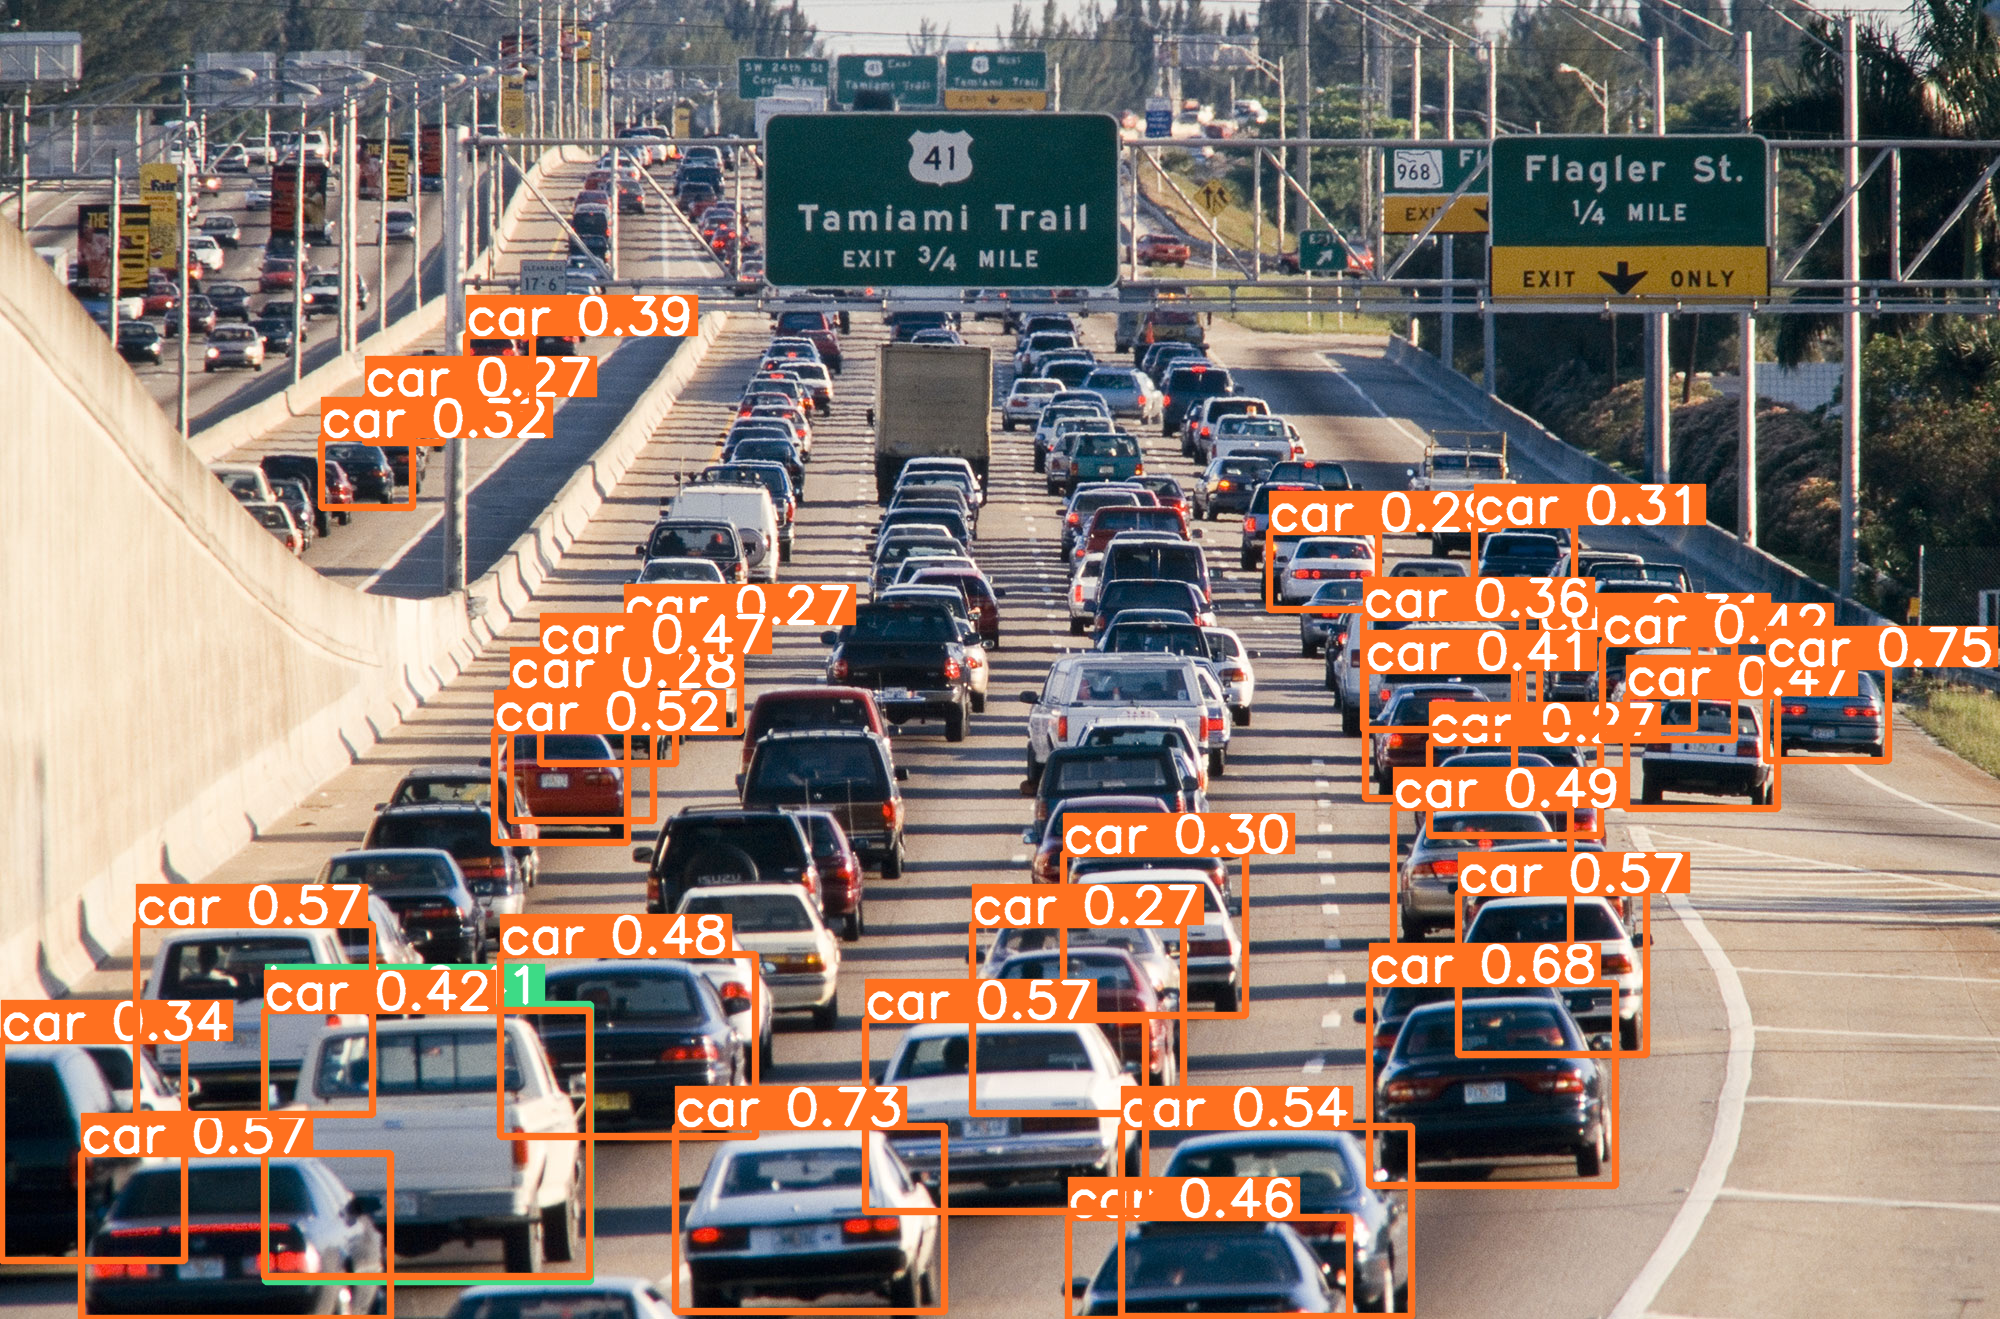

image 1/1: 516x640 3 persons
Speed: 18.9ms pre-process, 23.8ms inference, 1.7ms NMS per image at shape (1, 3, 544, 640)


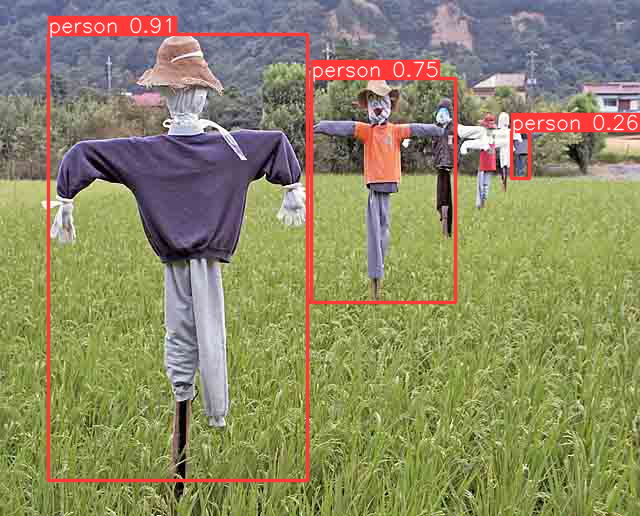

image 1/1: 1024x1024 1 knife, 2 bananas, 1 apple, 1 orange, 5 carrots, 1 potted plant, 1 vase
Speed: 32.9ms pre-process, 16.1ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)


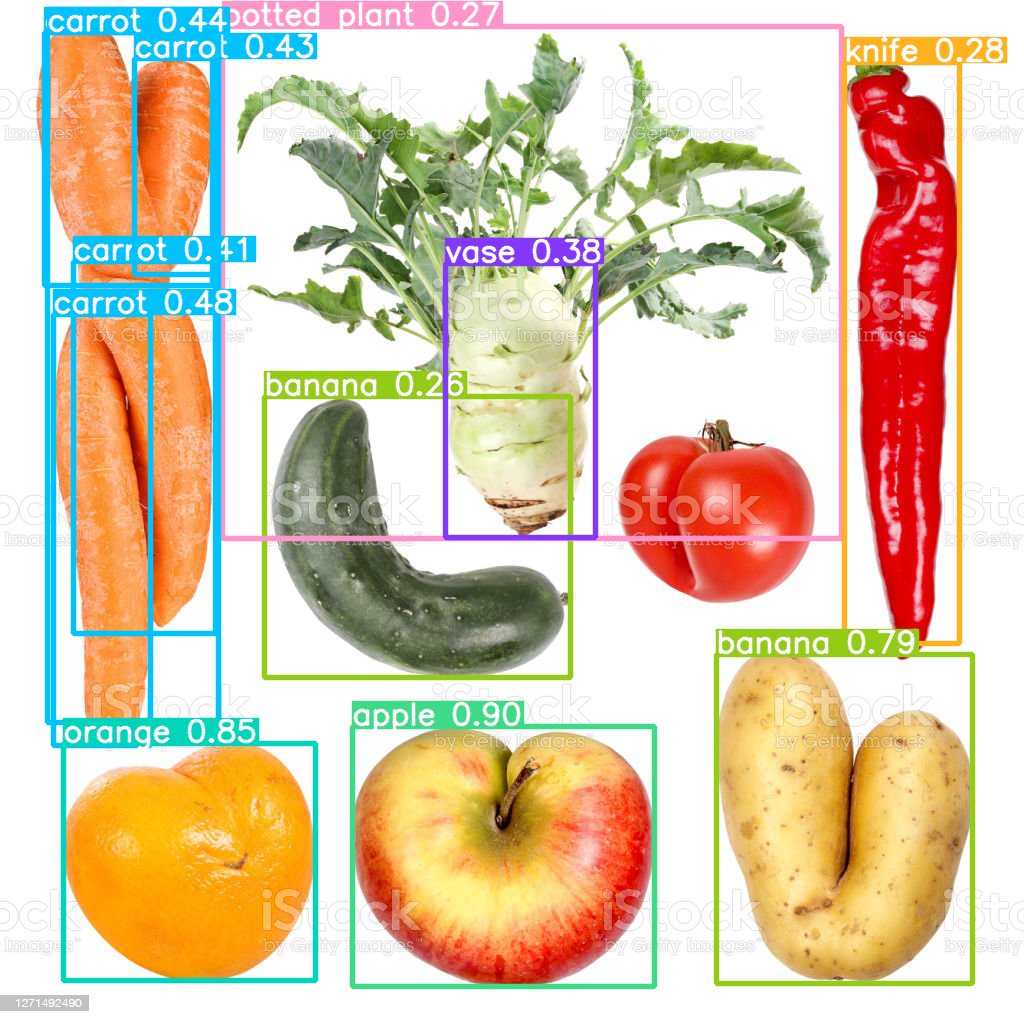

In [8]:
#Insert the inference code here.
img_occ = "img5.jpg"
img_mb = "img3.jpg"
img_d = "img4.jpg"
with torch.no_grad():
    results1 = model(img_occ)
    results1.print()
    results1.show()
    results2 = model(img_mb)
    results2.print()
    results2.show()
    results3 = model(img_d)
    results3.print()
    results3.show()

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [11]:
display_answer(hw2.answers.part6_q3)



**Your answer:**


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$



## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
#insert bonus code here

In [ ]:
display_answer(hw2.answers.part6_bonus)
